In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dftrain=pd.read_csv('test.csv')
dftrainlog=pd.read_csv('view_log.csv')
dftrainitem=pd.read_csv('item_data.csv')
#dftest=pd.read_csv('test.csv')

In [21]:
dftrain.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1


In [22]:
 def ShowPieChart(DataFrame,column1,column2):
    proportion=DataFrame.groupby(column1).count()[column2]
    col1=(((proportion)).sort_values(axis=0,ascending=False))
    total=proportion.sum()
    lstProportion=proportion/total
    col2=(((lstProportion*100)).sort_values(axis=0,ascending=False))
    plt.pie(lstProportion, autopct='%1.1f%%', shadow=False, startangle=140)
    plt.axis('equal')
    plt.show()
    dftemp=pd.DataFrame({'Total numer of rows':col1,'Ratio':col2})
    print(dftemp)

In [23]:
#ShowPieChart(dftrain,'is_click','is_4G')

In [24]:
dftrain.shape

(90675, 6)

In [25]:
len(dftrain['user_id'].unique())

34079

In [26]:
dftrainlog.head(2)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640


In [27]:
len(dftrainlog['user_id'].unique())

89157

In [28]:
len(dftrainlog['item_id'].unique())

126708

In [29]:
#dftrainlog[dftrain['user_id']==1]

In [30]:
dftrainitem.head(3)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619


In [31]:
dftrainlog.groupby('user_id').count().head(3)

,server_time,device_type,session_id,item_id
user_id,,,,
0,42,42,42,42
1,8,8,8,8
2,165,165,165,165


In [32]:
for col in dftrainlog.columns:
    print("----->",col)
    print(dftrainlog[col].dtype)

-----> server_time
object
-----> device_type
object
-----> session_id
int64
-----> user_id
int64
-----> item_id
int64


In [33]:
convert_dict = {'server_time': str, 
                'device_type':str,
                'session_id':str,
                'user_id':str,
                'item_id':str
               }

In [34]:
dftrainlog = dftrainlog.astype(convert_dict) 

In [35]:
for col in dftrainlog.columns:
    print("----->",col)
    print(dftrainlog[col].dtype)

-----> server_time
object
-----> device_type
object
-----> session_id
object
-----> user_id
object
-----> item_id
object


In [36]:
for col in dftrain.columns:
    print("----->",col)
    print(dftrain[col].dtype)

-----> impression_id
object
-----> impression_time
object
-----> user_id
int64
-----> app_code
int64
-----> os_version
object
-----> is_4G
int64


In [37]:
convert_dict = {'impression_id': str, 
                'impression_time':str,
                'user_id':str,
                'app_code':str,
                'os_version':str,
                'is_4G':str
               }  

In [38]:
dftrain = dftrain.astype(convert_dict) 

In [39]:
for col in dftrainitem.columns:
    print("----->",col)
    print(dftrainitem[col].dtype)

-----> item_id
int64
-----> item_price
int64
-----> category_1
int64
-----> category_2
int64
-----> category_3
int64
-----> product_type
int64


In [40]:
convert_dict = {'item_id': str,
                'item_price':str,
                'category_1':int,
                'category_2':int,
                'category_3':int,
                'product_type':int
               }

In [41]:
dftrainitem = dftrainitem.astype(convert_dict) 

In [42]:
dftrainloggroup=dftrainlog.groupby('user_id')['item_id'].agg([('count', 'count'), ('item_id', ', '.join)])

In [43]:
dftrainloggroup.reset_index('user_id',inplace=True)

In [44]:
dftrainloggroup.head(3)

,user_id,count,item_id
0,0,42,"44459, 44459, 44459, 44459, 44459, 44459, 4022..."
1,1,8,"64835, 27574, 22411, 91179, 126431, 67259, 409..."
2,10,92,"88834, 8241, 59255, 82124, 98271, 26950, 11329..."


In [45]:
dftrain['user_id'].astype(object,inplace=True)
dftrain['user_id'].dtype

dtype('O')

In [46]:
##Join the data

In [47]:
dftrainMerged=pd.merge(dftrain,dftrainloggroup[['user_id','count','item_id']],on='user_id',how='left')

In [48]:
#set(dftrainlog['user_id'].unique())-set(dftrain['user_id'].unique())

In [49]:
dftrainMerged.shape

(90675, 8)

In [50]:
dftrainMerged.head(4)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,count,item_id
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,1,128995
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,72,"55912, 80771, 80771, 8365, 8365, 8365, 75146, ..."
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1,9,"94943, 79328, 103001, 69943, 10379, 10379, 109..."
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1,37,"69755, 28621, 5754, 8541, 8541, 8541, 5754, 28..."


In [51]:
for col in dftrainMerged.columns:
    print("----->",col)
    print(dftrainMerged[col].dtype)

-----> impression_id
object
-----> impression_time
object
-----> user_id
object
-----> app_code
object
-----> os_version
object
-----> is_4G
object
-----> count
int64
-----> item_id
object


In [52]:

def getPriceItem(items):
    #print(items)
    item_prices=[]
    exception_item=[]
    for item in items:
        try:
            price=int(dftrainitem[dftrainitem['item_id'] == item]['item_price'])
            item_prices.append(price)
        except:
            item_prices.append(0)
            #print("Exception occured at ",item)
            exception_item.append(item)
            continue
    #print('item_prices',item_prices)
    avg=np.mean(item_prices)
    minimum=min(item_prices)
    #print('minimum',minimum)
    maximum=max(item_prices)
    return avg,minimum,maximum

In [53]:
import numpy as np

In [54]:
dftrainitem[dftrainitem['item_id']=='66370']

,item_id,item_price,category_1,category_2,category_3,product_type
117273,66370,14166,4,74,292,3399


In [55]:
int(dftrainitem[dftrainitem['item_id'] == '66370']['item_price'])

14166

In [56]:
len(dftrainMerged)

90675

In [57]:
#dftrainMerged.loc[[0:12],['AverageCost']]


## Now calculate the Average item price

In [58]:
filename='Merged'+str(1000)+'.csv'
filename

'Merged1000.csv'

In [85]:

def calculateAveragePrice(start,end):
    print("processing start for ",i," to ", j)
    
    lstavg=[]
    lstminimum=[]
    lstmaximum=[]
    counter=0
    
    dftemp=dftrainMerged.iloc[start:end,:]
    
    
    for index,rows in dftemp.iterrows():
        arrSplit=rows['item_id'].split(',')
        items=[str(i.strip()) for i in arrSplit]
        avg,minimum,maximum=getPriceItem(items)
        lstavg.append(avg)
        lstminimum.append(minimum)
        lstmaximum.append(maximum)
        #print(counter)
        counter+=1
    filename='Merged'+str(start)+'.csv'
    dftemp['AverageCost']=lstavg
    dftemp['MinCost']=lstminimum
    dftemp['MaxCost']=lstmaximum    
    dftemp.to_csv(filename)    

In [ ]:
for i in range(0,90675,1000):
    if(i<90000):
        i=i
        j=i+1000
        print('calculation starts for file',i)
        calculateAveragePrice(i,j)
    else:
        i=i
        j=90675
        print(i,j)                   
        calculateAveragePrice(i,j)

calculation starts for file 0
processing start for  0  to  1000


/home/vivek/anaconda3/envs/itensor/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/vivek/anaconda3/envs/itensor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/vivek/anaconda3/envs/itensor/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

calculation starts for file 1000
processing start for  1000  to  2000
calculation starts for file 2000
processing start for  2000  to  3000
calculation starts for file 3000
processing start for  3000  to  4000
calculation starts for file 4000
processing start for  4000  to  5000
calculation starts for file 5000
processing start for  5000  to  6000
calculation starts for file 6000
processing start for  6000  to  7000
calculation starts for file 7000
processing start for  7000  to  8000
calculation starts for file 8000
processing start for  8000  to  9000
calculation starts for file 9000
processing start for  9000  to  10000
calculation starts for file 10000
processing start for  10000  to  11000
calculation starts for file 11000
processing start for  11000  to  12000
calculation starts for file 12000
processing start for  12000  to  13000
calculation starts for file 13000
processing start for  13000  to  14000
calculation starts for file 14000
processing start for  14000  to  15000
calc

## Code Saved

In [108]:
dftrain=pd.read_csv('Merged.csv')
dftest=pd.read_csv('dffinalmerged.csv')

In [109]:
dftrain.shape

(22862, 13)

In [112]:
dftest.shape

(90675, 13)

In [117]:
dftrain.columns

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'count', 'item_id', 'AverageCost', 'MinCost', 'MaxCost',
       'is_click'],
      dtype='object')

In [114]:
cols=['impression_id', 'impression_time', 'user_id', 'app_code',
       'os_version', 'is_4G',  'count', 'item_id', 'AverageCost',
       'MinCost', 'MaxCost','is_click']
dftrain=dftrain[cols]
dftrain.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,count,item_id,AverageCost,MinCost,MaxCost,is_click
0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,12,"43209, 66370, 43209, 43209, 71877, 43209, 4320...",4452.833333,1024,14166,1
1,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,74339,481,old,0,61,"100847, 117590, 6131, 78766, 129770, 13924, 11...",13973.377049,377,209024,1
2,42998cf32d552343bc8e460416382dca,2018-11-15 00:42:00,81926,249,latest,0,138,"84085, 44104, 18653, 44104, 131433, 4907, 7615...",6876.427536,166,182144,1


In [115]:
dftest.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'impression_id', 'impression_time',
       'user_id', 'app_code', 'os_version', 'is_4G', 'count', 'item_id',
       'AverageCost', 'MinCost', 'MaxCost'],
      dtype='object')

In [116]:
col=['impression_id', 'impression_time',
       'user_id', 'app_code', 'os_version', 'is_4G', 'count', 'item_id',
       'AverageCost', 'MinCost', 'MaxCost']
dftest=dftest[col]
dftest.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,count,item_id,AverageCost,MinCost,MaxCost
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,1,128995,23424.000000,23424,23424
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,72,"55912, 80771, 80771, 8365, 8365, 8365, 75146, ...",10752.375000,207,54681
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1,9,"94943, 79328, 103001, 69943, 10379, 10379, 109...",4974.555556,1238,20309


In [118]:
dftest.shape

(90675, 11)

In [119]:
dftrain.shape

(22862, 12)

# Add additional columns

# For Test

In [127]:
arrpotentialusertest=dftest[dftest['user_id'].duplicated()]['user_id']

In [128]:
lstpotential=[]
for i,j in dftest.iterrows():
    #print(user)
    if(j['user_id'] in arrpotentialusertest):
        lstpotential.append(1)
    else:
        lstpotential.append(0)
dftest['potentialUser']=lstpotential

In [137]:
arrTimeOfDay=[]
for i in dftest['impression_time']:
    tim=i
    hour=int((tim[11:]).split(':')[0])
    #print(hour)
    if(hour<6):
        arrTimeOfDay.append(1)
    elif(hour<12):
        arrTimeOfDay.append(2)
    elif(hour<18):
        arrTimeOfDay.append(3)
    else:
        arrTimeOfDay.append(4)

In [138]:
dftest['TimeofDay']=arrTimeOfDay

In [139]:
dftest.shape

(90675, 13)

In [145]:
arrDay=[]
for i in dftest['impression_time']:
    tim=i
    day=int((tim[8:10]).split(':')[0])
    #print(day)
    arrDay.append(day)

In [146]:
dftest['Day']=arrDay

In [147]:
dftest.shape

(90675, 14)

# For Training

In [129]:
arrpotentialuser=dftrain[dftrain['user_id'].duplicated()]['user_id']

In [130]:
lstpotential=[]
for i,j in dftrain.iterrows():
    #print(user)
    if(j['user_id'] in arrpotentialuser):
        lstpotential.append(1)
    else:
        lstpotential.append(0)
dftrain['potentialUser']=lstpotential

In [135]:
arrTimeOfDay=[]
for i in dftrain['impression_time']:
    tim=i
    hour=int((tim[11:]).split(':')[0])
    #print(hour)
    if(hour<6):
        arrTimeOfDay.append(1)
    elif(hour<12):
        arrTimeOfDay.append(2)
    elif(hour<18):
        arrTimeOfDay.append(3)
    else:
        arrTimeOfDay.append(4)

In [136]:
dftrain['TimeofDay']=arrTimeOfDay

In [140]:
dftrain.shape

(22862, 14)

In [142]:
arrDay=[]
for i in dftrain['impression_time']:
    tim=i
    day=int((tim[8:10]).split(':')[0])
    #print(day)
    arrDay.append(day)

In [143]:
dftrain['Day']=arrDay

In [144]:
dftrain.shape

(22862, 15)

# -------------------------------------------------

In [148]:
dftrain.dtypes

impression_id       object
impression_time     object
user_id              int64
app_code             int64
os_version          object
is_4G                int64
count                int64
item_id             object
AverageCost        float64
MinCost              int64
MaxCost              int64
is_click             int64
potentialUser        int64
TimeofDay            int64
Day                  int64
dtype: object

In [150]:
dftrain['os_version'].unique()

array(['latest', 'old', 'intermediate'], dtype=object)

In [151]:
cleanup_nums = {"os_version":     {"latest": 2, "old": 1, "intermediate": 0},
               }

In [152]:
#dftrain.replace(cleanup_nums, inplace=True)
#dftrain.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,count,item_id,AverageCost,MinCost,MaxCost,is_click,potentialUser,TimeofDay,Day
0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,2,1,12,"43209, 66370, 43209, 43209, 71877, 43209, 4320...",4452.833333,1024,14166,1,0,1,15
1,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,74339,481,1,0,61,"100847, 117590, 6131, 78766, 129770, 13924, 11...",13973.377049,377,209024,1,0,1,15
2,42998cf32d552343bc8e460416382dca,2018-11-15 00:42:00,81926,249,2,0,138,"84085, 44104, 18653, 44104, 131433, 4907, 7615...",6876.427536,166,182144,1,0,1,15
3,a9a1d5317a33ae8cef33961c34144f84,2018-11-15 00:57:00,8779,242,2,1,29,"49782, 49782, 45958, 90576, 90576, 107829, 991...",12874.655172,352,127104,1,0,1,15
4,5d44ee6f2c3f71b73125876103c8f6c4,2018-11-15 01:02:00,8636,469,0,0,72,"38513, 106276, 131415, 116369, 108129, 41909, ...",9804.416667,96,68480,1,0,1,15


In [153]:
dftest.dtypes

impression_id       object
impression_time     object
user_id              int64
app_code             int64
os_version          object
is_4G                int64
count                int64
item_id             object
AverageCost        float64
MinCost              int64
MaxCost              int64
potentialUser        int64
TimeofDay            int64
Day                  int64
dtype: object

In [154]:
#dftest.replace(cleanup_nums, inplace=True)
#dftest.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,count,item_id,AverageCost,MinCost,MaxCost,potentialUser,TimeofDay,Day
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,2,1,1,128995,23424.000000,23424,23424,0,2,13
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,2,0,72,"55912, 80771, 80771, 8365, 8365, 8365, 75146, ...",10752.375000,207,54681,0,2,13
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,2,1,9,"94943, 79328, 103001, 69943, 10379, 10379, 109...",4974.555556,1238,20309,1,2,13


# Model Fitting

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import time
from sklearn import linear_model, neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [157]:
dftrain.dtypes

impression_id       object
impression_time     object
user_id              int64
app_code             int64
os_version           int64
is_4G                int64
count                int64
item_id             object
AverageCost        float64
MinCost              int64
MaxCost              int64
is_click             int64
potentialUser        int64
TimeofDay            int64
Day                  int64
dtype: object

# For Training

In [158]:
X=dftrain.drop(['is_click','impression_id','impression_time','item_id'],axis=1)
Y=dftrain['is_click']

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40,random_state=7)

In [160]:
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(result*100.0)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


63.182066703116455


In [164]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, scoring=scoring)
print(results.mean(), results.std())

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.24712862911408431 0.13137434958253874


In [166]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[5,10,20,50,100], 'min_samples_leaf':[2,3,4], 'max_leaf_nodes':[6,7,8], 'criterion':['gini','entropy'],
             'min_samples_split':[2,3,4]}
DecisionTree = DecisionTreeClassifier()
grid_search = GridSearchCV(DecisionTree,parameters)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [167]:
from sklearn.metrics import roc_auc_score
Decision_Tree_best = grid_search.best_estimator_
pos_prob = Decision_Tree_best.predict_proba(X_test)[:,1]

print('The ROC AUC on testing set is: {0:3f}'.format(roc_auc_score(Y_test, pos_prob)))

The ROC AUC on testing set is: 0.941250


In [165]:
model = RandomForestClassifier(criterion='entropy', max_depth = 5, max_leaf_nodes = 6, min_samples_leaf = 2, min_samples_split = 2)
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, scoring=scoring)
print(results.mean(), results.std())

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7614929317318712 0.18302182554602223


# For Test

In [161]:
Z=dftest.drop(['impression_id','impression_time','item_id'],axis=1)

In [168]:
y_predict=grid_search.predict(Z)

In [169]:
y_predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [170]:
len(y_predict)

90675

In [171]:
dftest=pd.read_csv('dffinalmerged.csv')

In [172]:
dftest['is_click']=y_predict

In [173]:
dftest.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'impression_id', 'impression_time',
       'user_id', 'app_code', 'os_version', 'is_4G', 'count', 'item_id',
       'AverageCost', 'MinCost', 'MaxCost', 'is_click'],
      dtype='object')

In [174]:
df=dftest.loc[:,['impression_id','is_click']]

In [175]:
df.to_csv('My_Submission.csv')

In [66]:
dftrain.to_csv('dftrainfinal.csv')

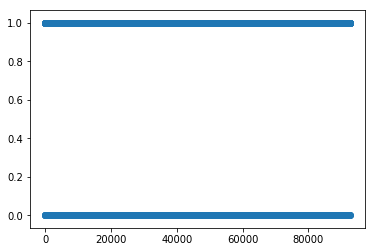

In [67]:
plt.scatter(dftrain['user_id'],dftrain['is_click'])

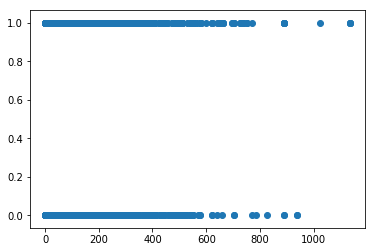

In [68]:
plt.scatter(dftrain['count'],dftrain['is_click'])

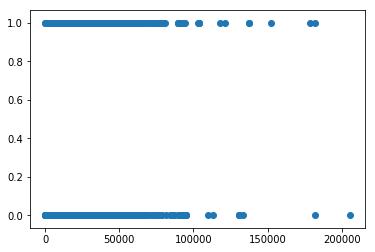

In [69]:
plt.scatter(dftrain['AverageCost'],dftrain['is_click'])

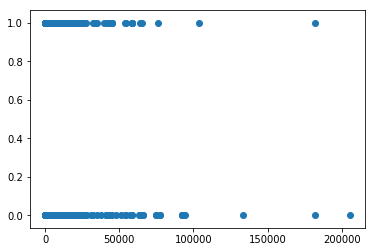

In [70]:
plt.scatter(dftrain['MinCost'],dftrain['is_click'])

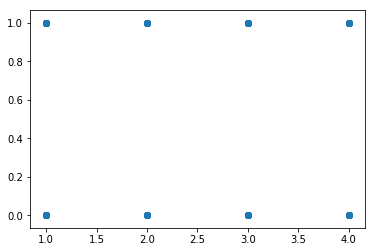

In [71]:
plt.scatter(dftrain['timeofDay'],dftrain['is_click'])

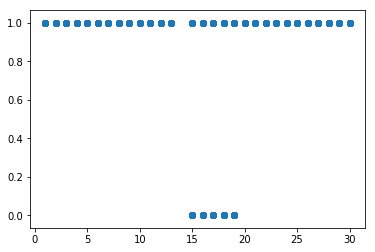

In [72]:
plt.scatter(dftrain['day'],dftrain['is_click'])

In [73]:
dftrain.groupby('user_id').count()

,Unnamed: 0,impression_id,impression_time,app_code,os_version,is_4G,is_click,count,item_id,AverageCost,MinCost,MaxCost,timeofDay,day
user_id,,,,,,,,,,,,,,
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1
33,1,1,1,1,1,1,1,1,1,1,1,1,1,1
36,1,1,1,1,1,1,1,1,1,1,1,1,1,1
37,1,1,1,1,1,1,1,1,1,1,1,1,1,1
44,1,1,1,1,1,1,1,1,1,1,1,1,1,1
46,1,1,1,1,1,1,1,1,1,1,1,1,1,1
48,1,1,1,1,1,1,1,1,1,1,1,1,1,1
60,1,1,1,1,1,1,1,1,1,1,1,1,1,1
65,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [74]:
arrpotentialuser=dftrain[dftrain['user_id'].duplicated()]['user_id']

In [75]:
lstpotential=[]
for i,j in dftrain.iterrows():
    #print(user)
    if(j['user_id'] in arrpotentialuser):
        lstpotential.append(1)
    else:
        lstpotential.append(0)
        

In [76]:
dftrain['potentialUser']=lstpotential

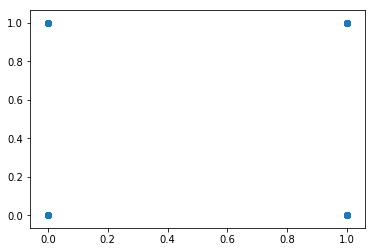

In [77]:
plt.scatter(dftrain['potentialUser'],dftrain['is_click'])

In [78]:
potuser = pd.crosstab(dftrain['potentialUser'], dftrain['is_click'])
print(potuser)

is_click           0     1
potentialUser             
0              11001  9968
1                999   894


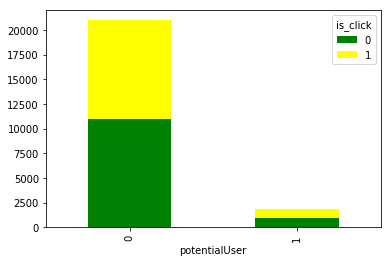

In [79]:
potuser.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [80]:
temp3 = pd.crosstab([dftrain['timeofDay'],dftrain['day'],dftrain["potentialUser"]],dftrain['is_click'])
temp3

is_click                        0    1
timeofDay day potentialUser           
1         1   0                 0   94
              1                 0    8
          2   0                 0  109
              1                 0   10
          3   0                 0   94
              1                 0   14
          4   0                 0  101
              1                 0    7
          5   0                 0   59
              1                 0    3
          6   0                 0   49
              1                 0    9
          7   0                 0   57
              1                 0    8
          8   0                 0   52
              1                 0    3
          9   0                 0   47
              1                 0    5
          10  0                 0   42
              1                 0    7
          11  0                 0   42
              1                 0    8
          12  0                 0   38
              1                 0    1
          13  0                 0   10
          15  0               647   69
              1                50    3
          16  0               498   47
              1                51    4
          17  0               462   48
...                           ...  ...
4         16  0              1060  101
              1               118    6
          17  0               676  127
              1                69   10
          18  0               507  133
              1                46   12
          19  0                 0  112
              1                 0   10
          20  0                 0  183
              1                 0   14
          21  0                 0  151
              1                 0   13
          22  0                 0  135
              1                 0   19
          23  0                 0   90
              1                 0   12
          24  0                 0  100
              1                 0   10
          25  0                 0   98
              1                 0    8
          26  0                 0  166
              1                 0   16
          27  0                 0  155
              1                 0   16
          28  0                 0  104
              1                 0    7
          29  0                 0  115
              1                 0   14
          30  0                 0  136
              1                 0    4

[226 rows x 2 columns]

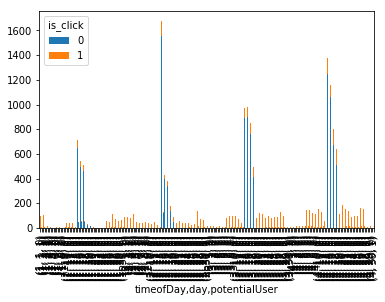

In [81]:
temp3.plot(kind="bar",stacked=True)
plt.show()

In [82]:
## Code for train test split

In [84]:
dftrain.head(2)

,Unnamed: 0,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,count,item_id,AverageCost,MinCost,MaxCost,timeofDay,day,potentialUser
0,0,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,12,"43209, 66370, 43209, 43209, 71877, 43209, 4320...",4452.833333,1024,14166,1,15,0
1,1,43ec517d68b6edd3015b3edc9a11367b,2018-11-15 00:06:00,74339,481,old,0,1,61,"100847, 117590, 6131, 78766, 129770, 13924, 11...",13973.377049,377,209024,1,15,0


In [85]:
dftrain.dtypes

Unnamed: 0           int64
impression_id       object
impression_time     object
user_id              int64
app_code             int64
os_version          object
is_4G                int64
is_click             int64
count                int64
item_id             object
AverageCost        float64
MinCost              int64
MaxCost              int64
timeofDay            int64
day                  int64
potentialUser        int64
dtype: object

In [87]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
dftrain['os_version']=enc.fit_transform(dftrain['os_version'])
dftrain['os_version'].unique()

array([1, 2, 0], dtype=int64)

In [88]:
dftrain.dtypes

Unnamed: 0           int64
impression_id       object
impression_time     object
user_id              int64
app_code             int64
os_version           int32
is_4G                int64
is_click             int64
count                int64
item_id             object
AverageCost        float64
MinCost              int64
MaxCost              int64
timeofDay            int64
day                  int64
potentialUser        int64
dtype: object

In [89]:
X=dftrain.drop(['is_click','impression_id','impression_time','item_id'],axis=1)
Y=dftrain['is_click']

In [90]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40,random_state=7)

# Logistic

In [91]:
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(result*100.0)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


94.65281574630946


In [92]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, scoring=scoring)
print(results.mean(), results.std())

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9977161396292753 0.0026334389978912597


In [93]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
clf = LogisticRegression(solver = 'lbfgs')
# fit the model
clf.fit(X_train, Y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [94]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(Y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          6682   462   7144
1          1158  5415   6573
All        7840  5877  13717


In [95]:
print ('Accuracy:', accuracy_score(Y_test, test_pred))
print ('F1 score:', f1_score(Y_test, test_pred))
print ('Recall:', recall_score(Y_test, test_pred))
print ('Precision:', precision_score(Y_test, test_pred))
print ('\n clasification report:\n', classification_report(Y_test,test_pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, test_pred))

Accuracy: 0.8861673045379989
F1 score: 0.8717190388170055
Recall: 0.8246677547213803
Precision: 0.9244641923680084

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4856
           1       0.92      0.82      0.87      4289

    accuracy                           0.89      9145
   macro avg       0.89      0.88      0.88      9145
weighted avg       0.89      0.89      0.89      9145


 confussion matrix:
 [[4567  289]
 [ 752 3537]]


In [96]:
model = RandomForestClassifier(criterion='entropy', max_depth = 5, max_leaf_nodes = 6, min_samples_leaf = 2, min_samples_split = 2)
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, scoring=scoring)
print(results.mean(), results.std())

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8806460773633241 0.10641214707366181


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, scoring=scoring)
print(results.mean(), results.std())

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8333333333333334 0.11785113019775792


In [99]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[5,10,20,50,100], 'min_samples_leaf':[2,3,4], 'max_leaf_nodes':[6,7,8], 'criterion':['gini','entropy'],
             'min_samples_split':[2,3,4]}
DecisionTree = DecisionTreeClassifier()
grid_search = GridSearchCV(DecisionTree,parameters)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [100]:
from sklearn.metrics import roc_auc_score
Decision_Tree_best = grid_search.best_estimator_
pos_prob = Decision_Tree_best.predict_proba(X_test)[:,1]

print('The ROC AUC on testing set is: {0:3f}'.format(roc_auc_score(Y_test, pos_prob)))

The ROC AUC on testing set is: 1.000000
